In [45]:
from datetime import datetime
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
now = datetime.now()

In [3]:
days_span = 365 # 1 year

start_date = datetime.now() - timedelta(days_span)
start_date = start_date.strftime("%Y-%m-%dT%H:%M:%SZ")
end_date = datetime.now().strftime("%Y-%m-%dT%H:%M:%SZ")

## Confirmed Cases Only

In [13]:
import requests
# response = requests.get(f'https://api.covid19api.com/country/singapore?from={start_date}&to={end_date}')
response = requests.get(f"https://api.covid19api.com/country/singapore/status/confirmed?from={start_date}&to={end_date}")

In [14]:
results = response.json()

In [15]:
results

[{'Country': 'Singapore',
  'CountryCode': 'SG',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '1.35',
  'Lon': '103.82',
  'Cases': 0,
  'Status': 'confirmed',
  'Date': '2020-01-22T00:00:00Z'},
 {'Country': 'Singapore',
  'CountryCode': 'SG',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '1.35',
  'Lon': '103.82',
  'Cases': 1,
  'Status': 'confirmed',
  'Date': '2020-01-23T00:00:00Z'},
 {'Country': 'Singapore',
  'CountryCode': 'SG',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '1.35',
  'Lon': '103.82',
  'Cases': 3,
  'Status': 'confirmed',
  'Date': '2020-01-24T00:00:00Z'},
 {'Country': 'Singapore',
  'CountryCode': 'SG',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '1.35',
  'Lon': '103.82',
  'Cases': 3,
  'Status': 'confirmed',
  'Date': '2020-01-25T00:00:00Z'},
 {'Country': 'Singapore',
  'CountryCode': 'SG',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '1.35',
  'Lon': '103.82',
  'Cases': 4,
  'Status': 'co

In [73]:
df = pd.DataFrame(results)
df.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Singapore,SG,,,,1.35,103.82,0,confirmed,2020-01-22T00:00:00Z
1,Singapore,SG,,,,1.35,103.82,1,confirmed,2020-01-23T00:00:00Z
2,Singapore,SG,,,,1.35,103.82,3,confirmed,2020-01-24T00:00:00Z
3,Singapore,SG,,,,1.35,103.82,3,confirmed,2020-01-25T00:00:00Z
4,Singapore,SG,,,,1.35,103.82,4,confirmed,2020-01-26T00:00:00Z


In [74]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Singapore,SG,,,,1.35,103.82,0,confirmed,2020-01-22
1,Singapore,SG,,,,1.35,103.82,1,confirmed,2020-01-23
2,Singapore,SG,,,,1.35,103.82,3,confirmed,2020-01-24
3,Singapore,SG,,,,1.35,103.82,3,confirmed,2020-01-25
4,Singapore,SG,,,,1.35,103.82,4,confirmed,2020-01-26


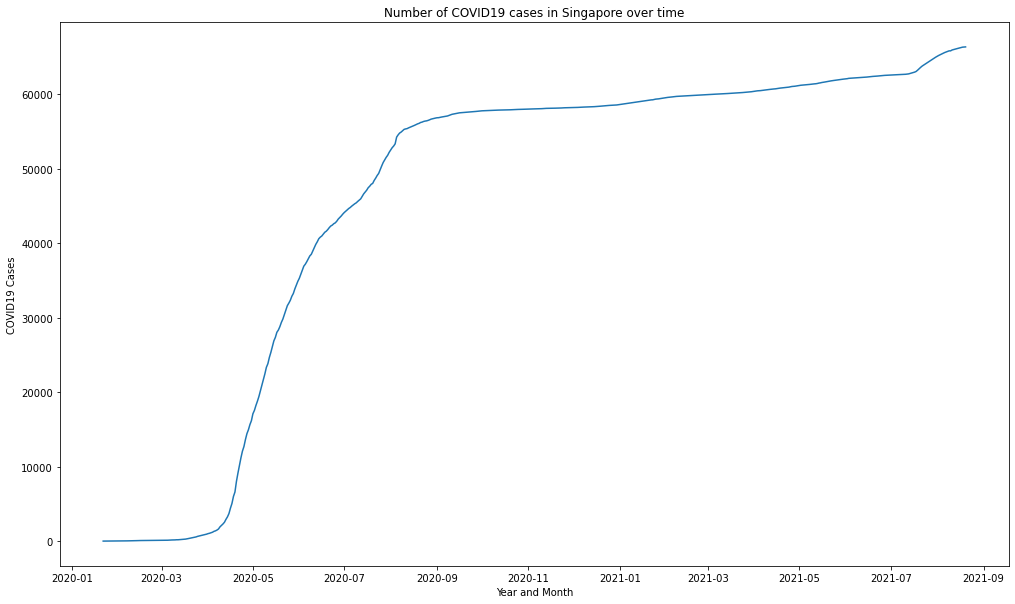

In [76]:
plt.figure(figsize=(17,10))
plt.plot(df['Date'], df['Cases'])
plt.title('Number of COVID19 cases in Singapore over time')
plt.xlabel('Year and Month')
plt.ylabel('COVID19 Cases')
plt.show()

## Cases by Different Status

In [62]:
all_status_response = requests.get(f'https://api.covid19api.com/country/singapore?from={start_date}&to={end_date}')
all_status_results = all_status_response.json()

In [63]:
df = pd.DataFrame(all_status_results)
df.head()

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,2484662a-37d0-4b6c-8272-34e5a86f26f0,Singapore,SG,,,,1.35,103.82,0,0,0,0,2020-01-22T00:00:00Z
1,f1471591-909d-4c12-9e8b-26ce43fa3b4e,Singapore,SG,,,,1.35,103.82,1,0,0,1,2020-01-23T00:00:00Z
2,ad7bf6e4-27b0-46e9-bdc5-998458be7e6c,Singapore,SG,,,,1.35,103.82,3,0,0,3,2020-01-24T00:00:00Z
3,25bb999d-2443-4505-925d-27f21af143f6,Singapore,SG,,,,1.35,103.82,3,0,0,3,2020-01-25T00:00:00Z
4,297dd8d4-5417-4922-9ac9-a93b9902d4c8,Singapore,SG,,,,1.35,103.82,4,0,0,4,2020-01-26T00:00:00Z


In [64]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df.head()

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,2484662a-37d0-4b6c-8272-34e5a86f26f0,Singapore,SG,,,,1.35,103.82,0,0,0,0,2020-01-22
1,f1471591-909d-4c12-9e8b-26ce43fa3b4e,Singapore,SG,,,,1.35,103.82,1,0,0,1,2020-01-23
2,ad7bf6e4-27b0-46e9-bdc5-998458be7e6c,Singapore,SG,,,,1.35,103.82,3,0,0,3,2020-01-24
3,25bb999d-2443-4505-925d-27f21af143f6,Singapore,SG,,,,1.35,103.82,3,0,0,3,2020-01-25
4,297dd8d4-5417-4922-9ac9-a93b9902d4c8,Singapore,SG,,,,1.35,103.82,4,0,0,4,2020-01-26


In [65]:
df = pd.melt(df, 
             id_vars=['ID', 'Country', "CountryCode", 'Lat', 'Lon', 'Date'], 
             value_vars = ['Confirmed','Deaths','Recovered','Active']).rename(columns={'variable': 'Case Type'})
df.head()

,ID,Country,CountryCode,Lat,Lon,Date,Case Type,value
0,2484662a-37d0-4b6c-8272-34e5a86f26f0,Singapore,SG,1.35,103.82,2020-01-22,Confirmed,0
1,f1471591-909d-4c12-9e8b-26ce43fa3b4e,Singapore,SG,1.35,103.82,2020-01-23,Confirmed,1
2,ad7bf6e4-27b0-46e9-bdc5-998458be7e6c,Singapore,SG,1.35,103.82,2020-01-24,Confirmed,3
3,25bb999d-2443-4505-925d-27f21af143f6,Singapore,SG,1.35,103.82,2020-01-25,Confirmed,3
4,297dd8d4-5417-4922-9ac9-a93b9902d4c8,Singapore,SG,1.35,103.82,2020-01-26,Confirmed,4


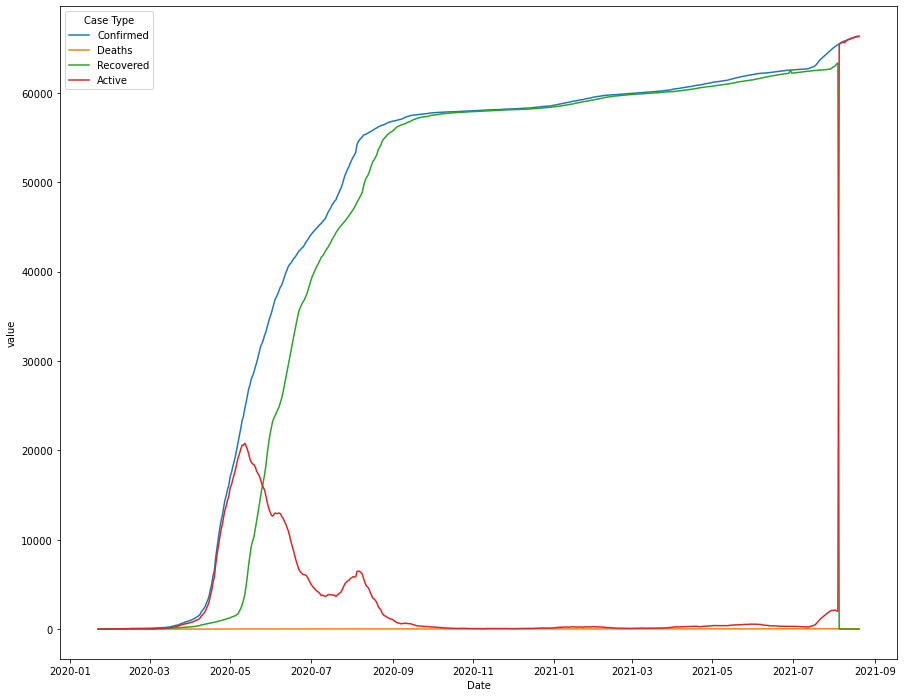

In [69]:
plt.figure(figsize=(15,12))
sns.lineplot(x='Date', y='value', data=df, hue='Case Type')

**The orange line (Deaths) may seem like it's 0 consistently throughout, but on closer look (due to the axis), there are cases of Deaths recorded and reflected.**

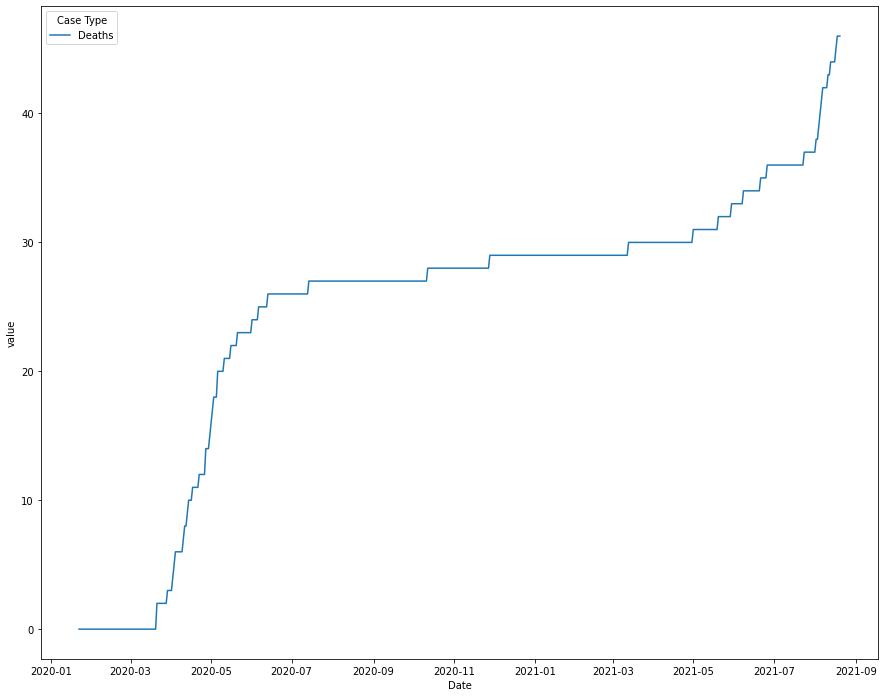

In [71]:
plt.figure(figsize=(15,12))
sns.lineplot(x='Date', y='value', data=df[df['Case Type'] == 'Deaths'], hue='Case Type')

In [61]:
df.tail(20)

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
556,7cd8630a-2b2e-48cb-808e-ad60ee7d8c43,Singapore,SG,,,,1.35,103.82,64981,37,62863,2081,2021-07-31
557,4c44f970-d552-481e-ad68-72d3c3cc622b,Singapore,SG,,,,1.35,103.82,65102,37,62957,2108,2021-08-01
558,2b9dc4c0-8194-4aba-8d38-15143a56292f,Singapore,SG,,,,1.35,103.82,65213,38,63033,2142,2021-08-02
559,48d6d2c3-8280-4143-b1ad-d29e8d19bc23,Singapore,SG,,,,1.35,103.82,65315,38,63252,2025,2021-08-03
560,170da623-3a7a-4225-9fe3-fa83c8b81694,Singapore,SG,,,,1.35,103.82,65410,39,63357,2014,2021-08-04
561,c0d0131e-4312-484f-8f83-42fba788ad84,Singapore,SG,,,,1.35,103.82,65508,40,0,65468,2021-08-05
562,d77f6abc-f4c2-4f93-89bb-7bedb510c244,Singapore,SG,,,,1.35,103.82,65605,41,0,65564,2021-08-06
563,fdc22ed0-b4ce-4d3b-8d21-a9ca67695415,Singapore,SG,,,,1.35,103.82,65686,42,0,65644,2021-08-07
564,611463bb-3a17-4c99-bf1b-b09dc3e47f6e,Singapore,SG,,,,1.35,103.82,65764,42,0,65722,2021-08-08
565,afb0a3e8-b2bf-4bf9-9088-5e5c796f9d0b,Singapore,SG,,,,1.35,103.82,65836,42,0,65614,2021-08-09
